In [1]:
# 기초 전처리
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os

# 캔버스 사이즈 적용
plt.rcParams['figure.figsize'] = (12, 9)

# 컬럼 전체 확인 가능하도록 출력 범위 설정
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

# pandas 결과값의 표현 범위 소수점 2자리수로 변경
pd.options.display.float_format = '{:.2f}'.format

# 파일 로드위한 directory 확인 및 현재 경로로 설정
a = os.getcwd()
os.chdir(a)

# 0. 데이터 불러오기

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 

print('Data Loading is Done!')

Data Loading is Done!


# 1. EDA & Preprocessing

## Basic Data constructure

In [3]:
print("The shape of Train Data is:", train.shape, "\n")
print("The shape of Test Data is:", test.shape)

The shape of Train Data is: (1460, 81) 

The shape of Test Data is: (1459, 80)


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
print(train.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
print(test.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


데이터에 결측치가 있는 것이 발견된다. 피처 엔지니어링을 통해 해당 변수들을 전처리할 필요가 있다.

## 이상치 제거

- 수치형 데이터에서 가장 빈번하게 나타난다.
    - 예측 범위가 넓은 데이터(e.g: 가격)은 데이터의 범위가 클 수록 예측 정확도가 떨어지기 때문에 이상치 확인은 중요하다.
- 이상치 제거의 기준을 단순히 숫자로만 판단하면 안된다.
    - '이상치 = 적절하지 않게 측정된 데이터' 라는 개념으로 인지하는게 중요.

> e.g) 
- OverallQual: Rates the overall material and finish of the house

- OverallCond: Rates the overall condition of the house

와 같은 데이터는 설문 조사자의 주관적 편향이 들어갈 우려가 있는 객관적이지 못한 데이터 이다.
이러한 데이터 또한 이상치로 간주할 수 있을 것이다.

In [8]:
# OverallQual , OverallCond 데이터의 이상치 제거


# OverallQual rate값이 4이하이면서 SalePrice가 20000 이상인 데이터 제거
train.drop( train[(train['OverallQual']<4 ) & ( train['SalePrice']>200000) ].index, inplace=True)
           
# OverallCond rate값이 4이하이면서 SalePrice가 20000 이상인 데이터 제거
train.drop( train[(train['OverallCond']<4 ) & ( train['SalePrice']>200000) ].index, inplace=True)
           
train.reset_index(drop=True, inplace=True)
           
#결과 확인
# 기존 train shape 결과 : The shape of Train Data is: (1460, 81) 
print(train.shape) 

(1458, 81)


## 종속 변수(SalePrice)의 로그화

### SalePrice 시각화

In [9]:
from scipy.stats import norm

The value of mu before log transformation is: 180761.24142661178 

The value of sigma after log transformation is: 79270.93617295024


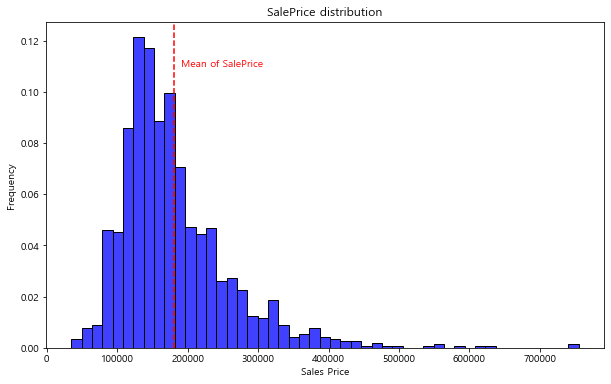

In [10]:
(mu, sigma) = norm.fit(train['SalePrice'])
print("The value of mu before log transformation is:" , mu, "\n")
print("The value of sigma after log transformation is:" , sigma)

# 캔버스 세팅
fig, ax = plt.subplots(figsize=(10,6))

# Histogram 데이터 입력
sns.histplot(train['SalePrice'], color ='b', stat='probability')

# 축 설정
ax.xaxis.grid(False) 
ax.set(ylabel = 'Frequency')
ax.set(xlabel = 'Sales Price')
ax.set(title = 'SalePrice distribution')

# 가격 평균선 입력
plt.axvline(mu, color='r', linestyle = '--')

# 가격 평균선 text 설정
plt.text(mu+10000, 0.11, 'Mean of SalePrice', rotation = 0, color = 'r')

fig.show()

- 주택 가격이 정규분포 형태를 이루지 않고 있다.
- 일반적인 선형 회귀는 각 데이터가 '정규분포를 만족한다' 를 전제로 한다.
- 따라서 해당 데이터를 np.log1p() 를 활용해 SalePrice를 로그화 한다.

The value of mu before log transformation is: 12.0233397799989 

The value of sigma after log transformation is: 0.3989191793099824


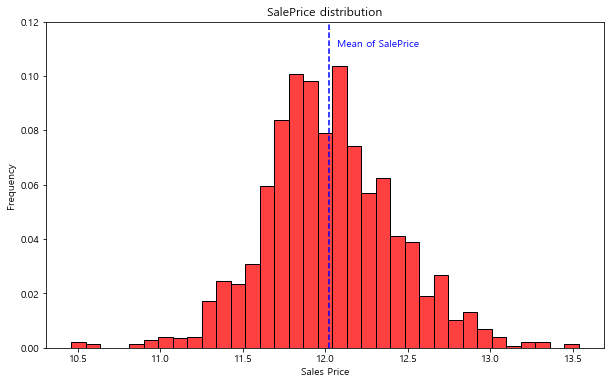

In [11]:
# SalePrice 로그화
train['SalePrice'] = np.log1p(train['SalePrice'])

(mu, sigma) = norm.fit(train['SalePrice'])
print("The value of mu before log transformation is:" , mu, "\n")
print("The value of sigma after log transformation is:" , sigma)

# 캔버스 세팅
fig, ax = plt.subplots(figsize=(10,6))

# Histogram 데이터 입력
sns.histplot(train['SalePrice'], color ='r', stat='probability')

# 축 설정
ax.xaxis.grid(False) 
ax.set(ylabel = 'Frequency')
ax.set(xlabel = 'Sales Price')
ax.set(title = 'SalePrice distribution')

# 가격 평균선 입력
plt.axvline(mu, color='b', linestyle = '--')

# 가격 평균선 text 설정
plt.text(mu+0.05, 0.111, 'Mean of SalePrice', rotation = 0, color = 'b')
plt.ylim(0, 0.12)

fig.show()

## 데이터 합치기 (Train + Test)

In [12]:
# 입력변수 = 각 컬럼의 ID는 별도 저장
train_ID = train['Id']
test_ID = test['Id']

# ID 제외 나머지 컬럼만 데이터에 남김
train.drop(['Id'], axis = 1, inplace = True)
test.drop(['Id'], axis = 1, inplace = True)

# 결과 확인
print("The shape of Train Data is:", train.shape, "\n")
print("The shape of Test Data is:", test.shape)

The shape of Train Data is: (1458, 80) 

The shape of Test Data is: (1459, 79)


In [13]:
# SalePrice 별도 추출 및 저장

y = train['SalePrice'].reset_index(drop = True)
train = train.drop('SalePrice', axis = 1)

# 결과 확인
print("The shape of Train Data is:", train.shape, "\n")
print("The shape of Test Data is:", test.shape, "\n")
print("The shape of y label is:", y.shape)

The shape of Train Data is: (1458, 79) 

The shape of Test Data is: (1459, 79) 

The shape of y label is: (1458,)


변수의 개수가 모두 동일하게 되어 두 데이터를 합칠 수 있다.

In [14]:
all_df = pd.concat([train, test]).reset_index(drop=True)

In [15]:
print("The shape of 'all_data' is:", all_df.shape )

The shape of 'all_data' is: (2917, 79)


### 결측치 처리

- 결측치 : 중간에 데이터 값이 비어 있는 경우.

#### 결측치 확인

In [16]:
# head_num : 결과 출력할때 haed()의 수

# df의 null값 비율 체크해서 비율로 변환 & 내림차순 정렬 함수
def check_na(data, head_num):
    """결측치 확인하여 비율로 변환"""
    isnull_ratio = (data.isnull().sum() / len(data)) * 100 
    data_na = isnull_ratio.drop(isnull_ratio[isnull_ratio == 0].index).sort_values(ascending = False)
    missing_data = pd.DataFrame({'Missing Ratio' : data_na,
                                    'Data Type' : data.dtypes[data_na.index]})
    print("결측치 데이터 컬럼 및 건수 : \n", missing_data.head(head_num))

In [17]:
# 결측치 확인
check_na(all_df, 20)

결측치 데이터 컬럼 및 건수 : 
               Missing Ratio Data Type
PoolQC                99.66    object
MiscFeature           96.40    object
Alley                 93.21    object
Fence                 80.43    object
FireplaceQu           48.68    object
LotFrontage           16.63   float64
GarageFinish           5.45    object
GarageQual             5.45    object
GarageCond             5.45    object
GarageYrBlt            5.45   float64
GarageType             5.38    object
BsmtExposure           2.81    object
BsmtCond               2.81    object
BsmtQual               2.78    object
BsmtFinType2           2.74    object
BsmtFinType1           2.71    object
MasVnrType             0.79    object
MasVnrArea             0.75   float64
MSZoning               0.14    object
BsmtFullBath           0.07   float64


In [18]:
# 결측치 비율이 평균 이상인 컬럼 (PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage) 제거

all_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis = 1, inplace = True)
check_na(all_df, 20)

결측치 데이터 컬럼 및 건수 : 
               Missing Ratio Data Type
GarageCond             5.45    object
GarageQual             5.45    object
GarageYrBlt            5.45   float64
GarageFinish           5.45    object
GarageType             5.38    object
BsmtCond               2.81    object
BsmtExposure           2.81    object
BsmtQual               2.78    object
BsmtFinType2           2.74    object
BsmtFinType1           2.71    object
MasVnrType             0.79    object
MasVnrArea             0.75   float64
MSZoning               0.14    object
Functional             0.07    object
Utilities              0.07    object
BsmtFullBath           0.07   float64
BsmtHalfBath           0.07   float64
GarageArea             0.03   float64
GarageCars             0.03   float64
TotalBsmtSF            0.03   float64


#### 문자열 결측치 처리

1) 방법 1. 각 변수를 확인해 개별적으로 필요 데이터를 채워넣는 방식
- 문자열 결측치 : 빈도수 위주로 채워넣기 (출현 빈도가 가장 높은 문자열로 일괄 처리)
- 수치 데이터 결측치 : 평균(mean) or 중간값(median) 으로 채워넣기

2) 방법 2. 일괄적으로 0 or None 값을 채워넣기
- fillna() 함수로 일괄처리 가능

방법 1 사용 - 문자열 데이터 최빈값으로 채워넣기

In [19]:
# train에서 dtype이 object인 변수명 별도 추출
cat_all_vars = train.select_dtypes(exclude = [np.number])
print("The whole number of all_vars", len(list(cat_all_vars)),'\n')


# 기존에 결측치 문제로 제거한 변수를 제외한 다른 변수들에 적용하기 위해 제거된 변수들을 제외
# 기존에 제거한 변수들 중 object 형태의 변수들만 범위로 지정
final_cat_vars = []
for v in cat_all_vars: # train의 모든 object 변수들중에
    if v not in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']: # drop한 변수외의 변수들을
        final_cat_vars.append(v)  # final_cat_vars에 append하기
print("The whole number of final_cat_vars", len(list(final_cat_vars)),'\n')

# 각 변수별로 최빈값(최빈단어)로 fillna
for i in final_cat_vars:
    all_df[i] = all_df[i].fillna(i).mode()[0]
    
print(check_na(all_df,15)) # float에만 null값이 남아있고, 모든 object에서의 null값은 대체되었다.

The whole number of all_vars 43 

The whole number of final_cat_vars 38 

결측치 데이터 컬럼 및 건수 : 
               Missing Ratio Data Type
GarageYrBlt            5.45   float64
MasVnrArea             0.75   float64
BsmtFullBath           0.07   float64
BsmtHalfBath           0.07   float64
BsmtFinSF1             0.03   float64
BsmtFinSF2             0.03   float64
BsmtUnfSF              0.03   float64
TotalBsmtSF            0.03   float64
GarageCars             0.03   float64
GarageArea             0.03   float64
None


방법 1 사용 - 수치형데이터 (median 으로 채워넣기)

In [20]:

# train 에서 숫자형 변수의 리스트 생성
num_all_vars = list(train.select_dtypes(include=[np.number]))
print("The whole number of all_vars", len(list(num_all_vars)),'\n')

# 결측치 비율 기준 제거한 숫자형 변수는 1개
# 간단하게 remove() 를 써서 drop
num_all_vars.remove('LotFrontage')

# 수치형 변수들의 중앙값(median)으로 결측치 채워넣기
print("The whole number of final_cat_vars", len(list(num_all_vars)),'\n')
for i in num_all_vars:
    all_df[i].fillna(value = all_df[i].median(), inplace = True)
    
# 최종 결과 확인
check_na(all_df,10) 

# 모든 결측치 사라진 것 확인

The whole number of all_vars 36 

The whole number of final_cat_vars 35 

결측치 데이터 컬럼 및 건수 : 
 Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []


### 왜도(skewness)값 처리

- 분포의 비대칭도를 나타내는 통계량 (자료의 대칭성을 확인하는 측도의 한 종류)
- 정규 분포와 같이 대칭인 분포는 왜도값이 0이다.
- 수치형 데이터에 적용가능하며, 예측 변수 활용할때 왜도의 보정은 매우 중요하다.
- 왜도 문제를 해결한 데이터일때 예측 모델의 신뢰도를 더 높일 수 있기 때문이다.

---
![image](https://user-images.githubusercontent.com/74717033/132131943-f7a6e177-1d10-4a15-89d1-e655ab8fbf04.png)
[Resource: 밥먹는 개발자](https://dining-developer.tistory.com/17)

In [23]:
from scipy.stats import skew

# 수치형 데이터 왜도 구하는 함수 생성
def find_skew(x):
    return skew(x)

# 수치형 변수 왜도를 구하고 내림차순으로 정렬
skew_features = all_df[num_all_vars].apply(find_skew).sort_values(ascending = False)
skew_features

MiscVal         21.94
PoolArea        16.89
LotArea         12.87
LowQualFinSF    12.08
3SsnPorch       11.37
KitchenAbvGr     4.32
BsmtFinSF2       4.14
EnclosedPorch    4.01
ScreenPorch      3.95
BsmtHalfBath     3.93
MasVnrArea       2.62
OpenPorchSF      2.53
WoodDeckSF       1.84
1stFlrSF         1.47
BsmtFinSF1       1.43
MSSubClass       1.37
GrLivArea        1.27
TotalBsmtSF      1.17
BsmtUnfSF        0.92
2ndFlrSF         0.86
TotRmsAbvGrd     0.76
Fireplaces       0.73
HalfBath         0.70
BsmtFullBath     0.63
OverallCond      0.58
BedroomAbvGr     0.33
GarageArea       0.24
OverallQual      0.20
MoSold           0.20
FullBath         0.16
YrSold           0.13
GarageCars      -0.22
GarageYrBlt     -0.40
YearRemodAdd    -0.45
YearBuilt       -0.60
dtype: float64